In [13]:
!pip install fbprophet

     |████████████████████████████████| 64 kB 624 kB/s eta 0:00:01
     |████████████████████████████████| 37.4 MB 666 kB/s eta 0:00:01
     |████████████████████████████████| 45 kB 711 kB/s eta 0:00:01
     |████████████████████████████████| 121 kB 610 kB/s eta 0:00:01
     |████████████████████████████████| 823 kB 582 kB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 527 kB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/verasong/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/3y/ncvr95_55g32v6m6tc5khrlc0000gn/T/pip-install-cvdpyrom/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/3y/ncvr95_55g32v6m6tc5khrlc0000gn/T/pip-install-cvdpyrom/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/3y/ncvr95_55g32

In [2]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [3]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

## Read Data: SP500

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [7]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [8]:
query = '''
select * from SP500
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469,1478,1438,1455,1455,931800000
1,2000-01-04,1455,1455,1397,1399,1399,1009000000
2,2000-01-05,1399,1413,1378,1402,1402,1085500000
3,2000-01-06,1402,1412,1392,1403,1403,1092300000
4,2000-01-07,1403,1441,1401,1441,1441,1225200000


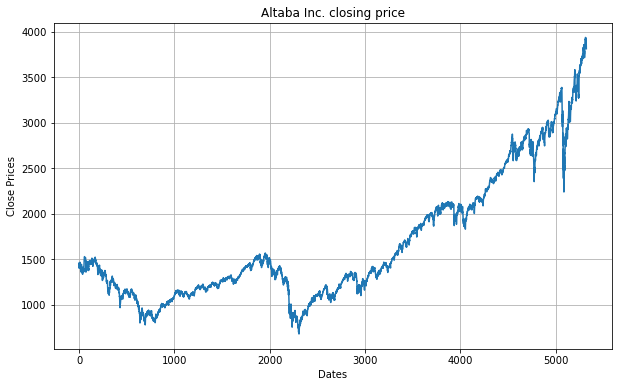

In [9]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

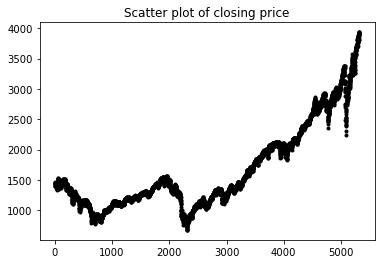

In [10]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## build the predictive model

In [12]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2000-01-03,1455
1,2000-01-04,1399
2,2000-01-05,1402
3,2000-01-06,1403
4,2000-01-07,1441


In [17]:
from fbprophet import Prophet

In [18]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

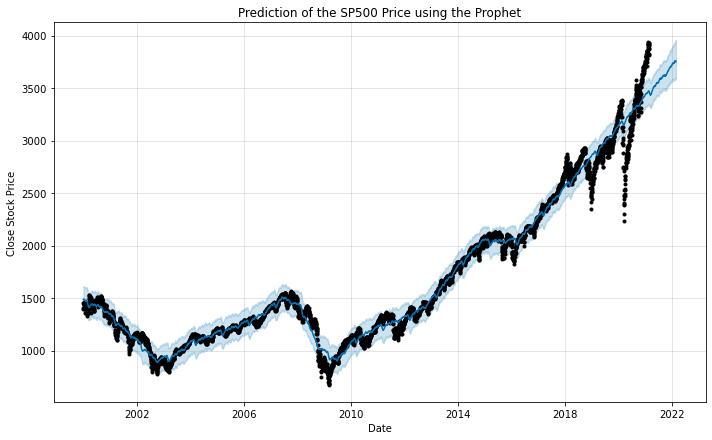

In [20]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the SP500 Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

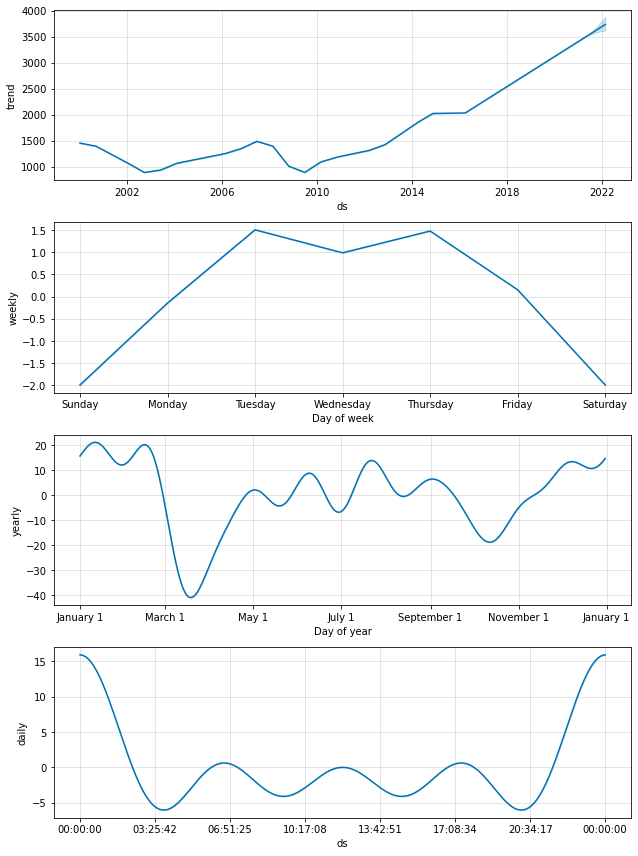

In [21]:
m.plot_components(prediction)
plt.show()